In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [116]:
df_1=pd.read_csv("D:\\University\\Zemestan 1402\\Prompt Eng Courses\\Tensorflow\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\DATA\\RSCCASN.csv")

In [117]:
df_1.head()

,DATE,RSCCASN
0,1992-01-01,6938
1,1992-02-01,7524
2,1992-03-01,8475
3,1992-04-01,9401
4,1992-05-01,9558


In [4]:
df_1.info

<bound method DataFrame.info of            DATE  RSCCASN
0    1992-01-01     6938
1    1992-02-01     7524
2    1992-03-01     8475
3    1992-04-01     9401
4    1992-05-01     9558
..          ...      ...
329  2019-06-01    21123
330  2019-07-01    21714
331  2019-08-01    23791
332  2019-09-01    19695
333  2019-10-01    21113

[334 rows x 2 columns]>

ParseDate parses a date string according to a formatter defined with the NewDateFormatter function. A date value that is either serial or UNIX, depending on the formatter specified, is returned. If the date cannot be parsed then an undefined value is returned. 

In [5]:
df=pd.read_csv("D:\\University\\Zemestan 1402\\Prompt Eng Courses\\Tensorflow\\FINAL_TF2_FILES\\TF_2_Notebooks_and_Data\\DATA\\RSCCASN.csv", parse_dates=True, index_col='DATE')

In [6]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


<AxesSubplot:xlabel='DATE'>

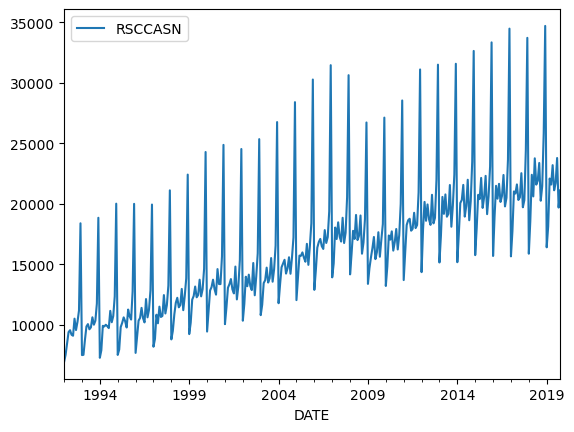

In [8]:
df.plot()

Note: The data is monthly. We can consider the last 18 months (1.5 years) as the test data.

In [9]:
len(df)-18

316

In [10]:
test_size=18
test_ind=len(df)- test_size

In [11]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [12]:
train.head()

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [13]:
from sklearn.preprocessing import MinMaxScaler

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
scaler=MinMaxScaler()

In [15]:
scaler.fit(train)

MinMaxScaler()

In [16]:
scaled_train=scaler.transform(train)

In [17]:
scaled_test=scaler.transform(test)

In [18]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [19]:
len(test)

18

Note: as is claer, the test size is 18. Therefore timeseriesgenerator size should be less than 18. If we set the length on 18 and we get 18 data we can predict the 19th data but the 19 th data is not available. However is length is 16 we can get the 16 data and predict the 17th data, which is available and can be compared with its real amount.

In [20]:
length=12

In [21]:
generator=TimeseriesGenerator(scaled_train, scaled_train,length=length, batch_size=1)

In [22]:
X,y=generator[0]

In [23]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [24]:
y

array([[0.02047633]])

In [25]:
scaled_train[12]

array([0.02047633])

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [28]:
n_features=1

In [30]:
model=Sequential()
model.add(LSTM(100, activation='relu',input_shape=(length,n_features)))
model.add(Dense(1)) #whic is the out put cell
model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
early_stop=EarlyStopping(monitor='val_loss', patience=5)

In [53]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

In [54]:
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0058 - val_loss: 0.0028
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0056 - val_loss: 0.0022
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 8/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021 - val_loss: 7.6531e-04
Epoch 9/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - val_loss: 9.4664e-04
Epoch 11/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 12/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [55]:
losses=pd.DataFrame(model.history.history)

<AxesSubplot:>

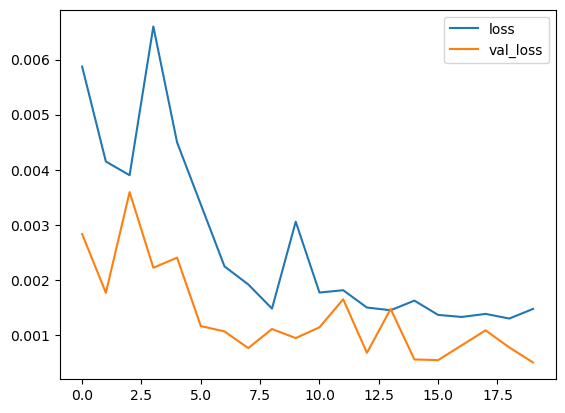

In [56]:
losses.plot()

In [57]:
test_predictions=[]

first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [58]:
true_prediction=scaler.inverse_transform(test_predictions)

In [59]:
test['predictions']=true_prediction
test

C:\Users\moham\AppData\Local\Temp\ipykernel_15168\1535319023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_prediction


,RSCCASN,predictions
DATE,,
2018-05-01,23764,21720.553151
2018-06-01,21589,20420.467478
2018-07-01,21919,20545.515496
2018-08-01,23381,21981.249970
2018-09-01,20260,19491.509318
2018-10-01,21473,20641.007905
2018-11-01,25831,25608.799126
2018-12-01,34706,33311.397534
2019-01-01,16410,15996.240913


<AxesSubplot:xlabel='DATE'>

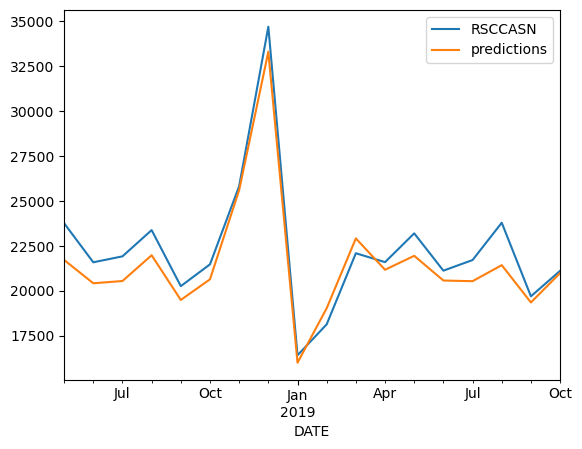

In [60]:
test.plot()

Let's forecast more with the our full data. We want to predict some data that we do not have currently!

In [132]:
fullscaler=MinMaxScaler()
scaled_full_data=fullscaler.fit_transform(df)

In [133]:
length=12
generator=TimeseriesGenerator(scaled_full_data, scaled_full_data,length=length, batch_size=1)

In [134]:
model=Sequential()
model.add(LSTM(100, activation='relu',input_shape=(length,n_features)))
model.add(Dense(1)) #whic is the out put cell
model.compile(optimizer='adam', loss='mse')

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [135]:
model.fit(generator, epochs=8)

Epoch 1/8
 50/322 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0611

C:\Users\moham\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0313
Epoch 2/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0142
Epoch 3/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0127
Epoch 4/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0048
Epoch 5/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0034
Epoch 6/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0019
Epoch 7/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0012
Epoch 8/8
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015


Note: Here we can cheat and see in our previous training on how many epochs the model strated to go thourgh the overfitting. Then use it hear. This is because we do not have any test data here to use it to estimate the overfitting.

In [136]:
test_predictions=[]

length=12
first_eval_batch=scaled_full_data[-length:]
current_batch=first_eval_batch.reshape(1,length,n_features)

for i in range(12):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [137]:
true_prediction=scaler.inverse_transform(test_predictions)

In [138]:
true_prediction

array([[26512.37582493],
       [37394.20241547],
       [16115.86705112],
       [17906.24176121],
       [21713.22601938],
       [21305.33971548],
       [23109.76124144],
       [20970.82980108],
       [21702.75821924],
       [23958.23259068],
       [19901.10796785],
       [21413.7723999 ]])

In [139]:
df

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


Note: We have to add the true_prediction values to the df (as we have predicted)

Note: We can use pd.daterange to add dates in the df. The start point is the last point of the df in the dates.We want to add another 12 preiods to this one!fre=ms shows that 12 periods of month should be added to the starting point

In [140]:
forecast_index=pd.date_range(start='2019-10-01', periods=12, freq='MS')

In [141]:
forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [142]:
forecast_df=pd.DataFrame(data=true_prediction, index=forecast_index, columns=['forecast'])

In [143]:
forecast_df

,forecast
2019-10-01,26512.375825
2019-11-01,37394.202415
2019-12-01,16115.867051
2020-01-01,17906.241761
2020-02-01,21713.226019
2020-03-01,21305.339715
2020-04-01,23109.761241
2020-05-01,20970.829801
2020-06-01,21702.758219
2020-07-01,23958.232591


<AxesSubplot:xlabel='DATE'>

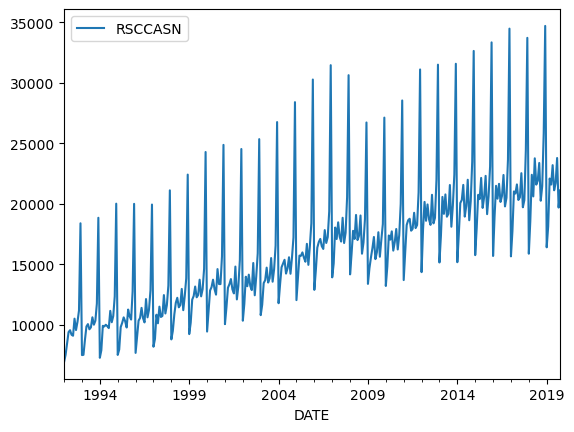

In [144]:
df.plot()

<AxesSubplot:>

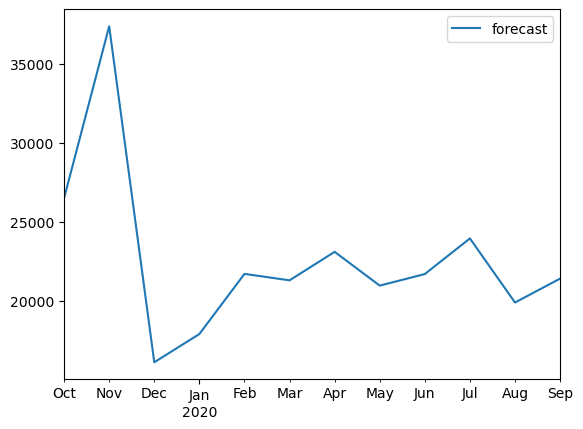

In [145]:
forecast_df.plot()

We can plot the two diagrams in the same axis:

<AxesSubplot:xlabel='DATE'>

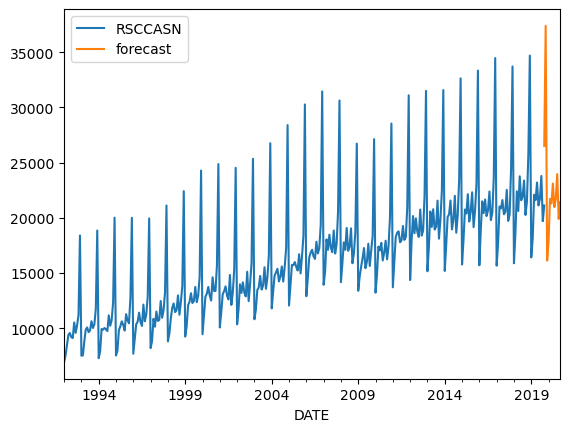

In [146]:
ax=df.plot()
forecast_df.plot(ax=ax)

(576.0, 611.0)

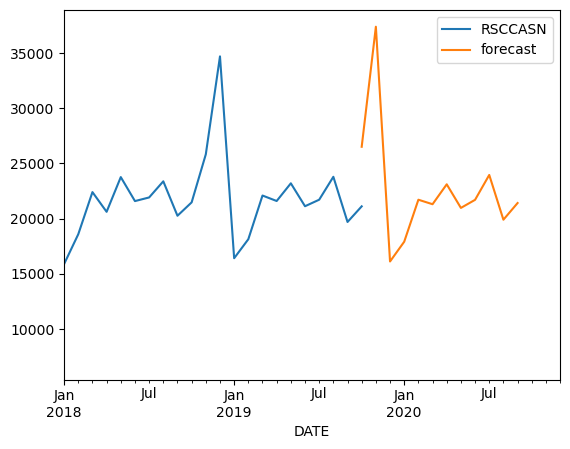

In [148]:
#you can also zoom in
ax=df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')